In [1]:
from vpython import*
import matplotlib.pyplot as plt
import numpy as np
import time
import random

<IPython.core.display.Javascript object>

# Random Walker
Random number uniformity below

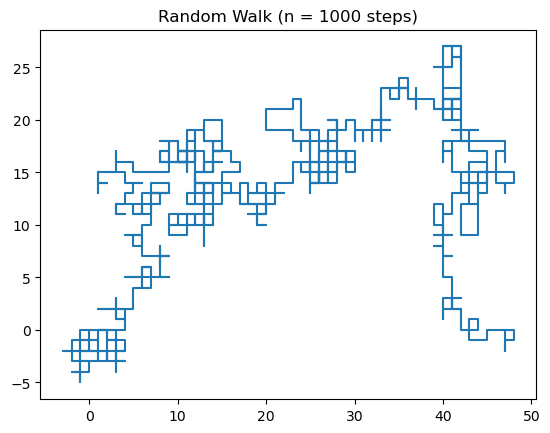

In [2]:
# defining the number of steps
n = 1000
x = np.zeros(n)
y = np.zeros(n)
for i in range(1, n):
    val = random.randint(1, 4)
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1

#yuh
plt.title("Random Walk (n = " + str(n) + " steps)")
plt.plot(y,x)

plt.show()

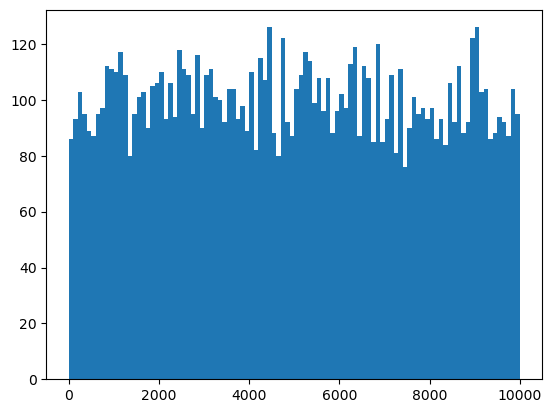

In [3]:
x = 10000
numList = []
freq = []
for i in range(x):
    a = random.randint(1, x)
    numList.append(a)
plt.hist(numList, bins = 100)
plt.show()

Expected vs Actual Distance Per Run

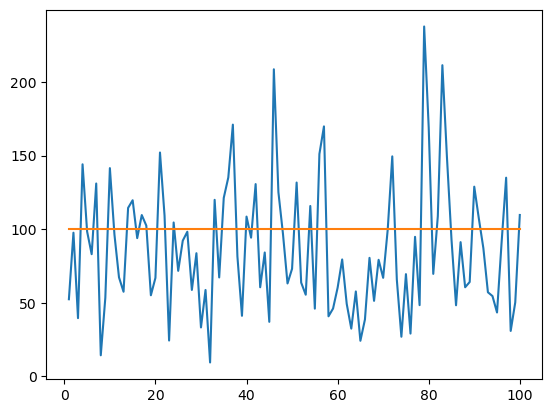

In [4]:
n = 10000
actualDist = []
for t in range(1,101):
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(1, n):
        val = random.randint(1, 4)
        if val == 1:
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1]
        elif val == 2:
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1]
        elif val == 3:
            x[i] = x[i - 1]
            y[i] = y[i - 1] + 1
        else:
            x[i] = x[i - 1]
            y[i] = y[i - 1] - 1
    dist = ((x[n-1] - x[0])**2 + (y[n-1] - y[0])**2)**0.5
    actualDist.append(dist)
nums = list(range(1,101))
plt.plot(nums,actualDist)
expectedDist = [n**0.5] * 100
plt.plot(nums,expectedDist)
plt.show()

# 1D Cellular Automata
I'll be totally real: I chose this rule (**45**) because I looked at this website to find the coolest looking rule:
https://plato.stanford.edu/entries/cellular-automata/supplement.html

This cellular automata simulation is seen so much in nature, which fascinates me. I found this photo of a hermit crab shell with very familiar designs on it:
https://pbs.twimg.com/media/EalDRBDXsAMjllC.jpg
The fact that I can simulate this texture is crazy to me. I'm very glad I took this class

To set a break point, I simply just set a time limit and scaled the size of the image to that time limit

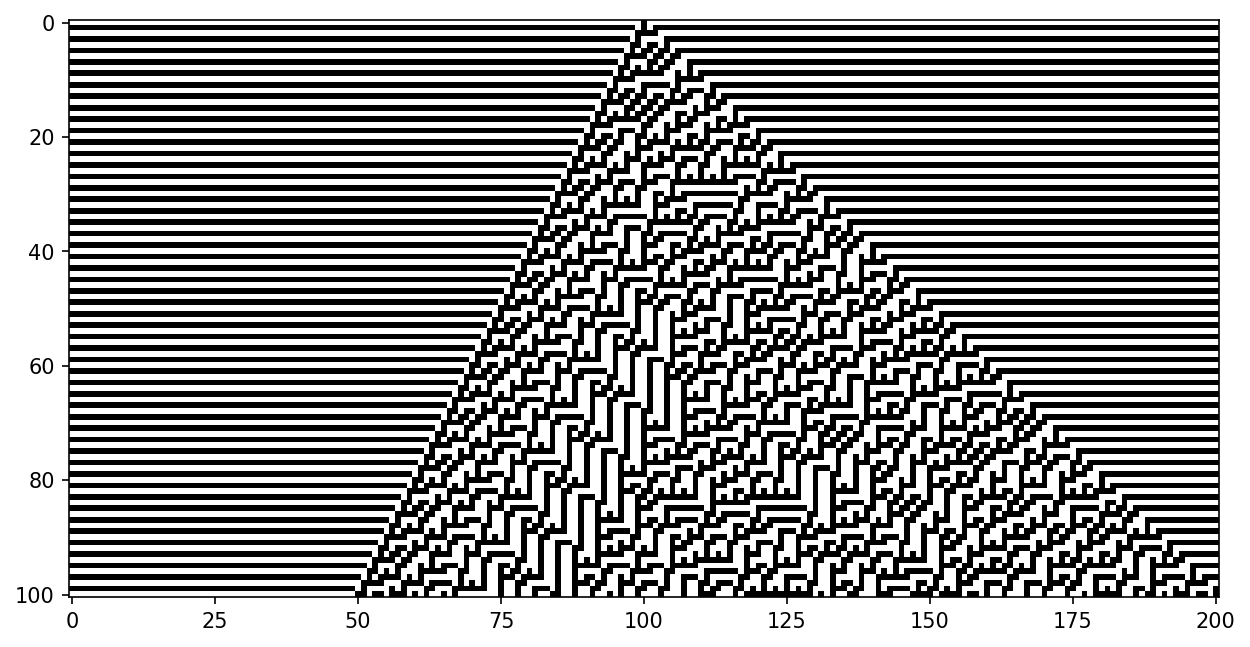

In [5]:
import numpy as np
import matplotlib.pyplot as plt

r = 1 
timeLim = 100
size = timeLim * 2 + 1  # width odd number is ideal
ruleNo = 45
binaryRule = format(ruleNo, '0' + str(np.power(2, (2 * r + 1))) + 'b')
rules = list(binaryRule)

def validate(neighbors):
    b = ''
    for num in neighbors:
        b += str(num)
    index = np.power(2, (2 * r + 1)) - 1 - int(b, 2)
    return int(rules[index])

def update(u):
    u_next = []
    for num in range(size):
        nbs = []
        for i in range(num - r, num + r + 1):
            nbs.append(u[i % size])
        u_next.append(validate(nbs))
    return u_next

U = np.zeros(size, dtype=int)
U[int((size - 1) / 2)] = 1
W = np.array([U])
for j in range(timeLim):
    U = update(U)
    W = np.vstack((W, U))

fig = plt.figure(dpi=150, figsize=[10, 5])
ax = fig.add_subplot(111)
img = ax.imshow(W, interpolation="nearest", cmap=plt.cm.Greys)
plt.show()

# Conway's Game of Life
i couldn't quite figure out a way to make my own oscillators and spaceships because of how I have this setup, but by visual observation this did have those qualities. 

**Note: matplotlib has problems running animation in jupyter notebook, so the animation will save as "test.gif" in the notebook directory**

MovieWriter ffmpeg unavailable; using Pillow instead.


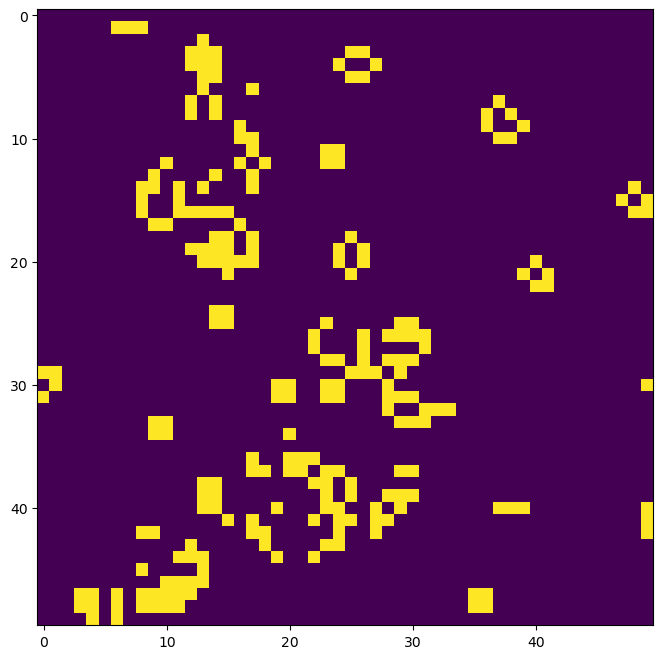

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as mAnim
def grid(N=50, p=0.5):
    return np.random.choice([0, 1], size=(N, N), p=[1-p, p])
def animate(frame, life_area, img):
    new_grid = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            n = (life_area[(i+1)%N][j] + life_area[(i-1)%N][j]
                 + life_area[i][(j+1)%N] + life_area[i][(j-1)%N]
                 + life_area[(i+1)%N][(j+1)%N] + life_area[(i-1)%N][(j-1)%N]
                 + life_area[(i+1)%N][(j-1)%N] + life_area[(i-1)%N][(j+1)%N])
            if life_area[i][j] == 0 and n == 3:
                new_grid[i][j] = 1
            elif life_area[i][j] == 1 and (n < 2 or n > 3):
                new_grid[i][j] = 0
            else:
                new_grid[i][j] = life_area[i][j]
    img.set_data(new_grid)
    life_area[:] = new_grid[:]
    return img
N = 50
life_area = grid(N=N, p=0.5)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
img = ax.imshow(life_area, interpolation='nearest')
ani = mAnim(fig, animate, fargs=(life_area, img,), frames=200, interval=200, save_count=50)
ani.save('test.gif')
plt.show()

# Conway's Game but Asynchronos and Cyclically Random
I randomized this by making the update range on the nested for loop a random number between 0 and N. Therefore every time the loop runs, it won't hit every column in the life_area

MovieWriter ffmpeg unavailable; using Pillow instead.


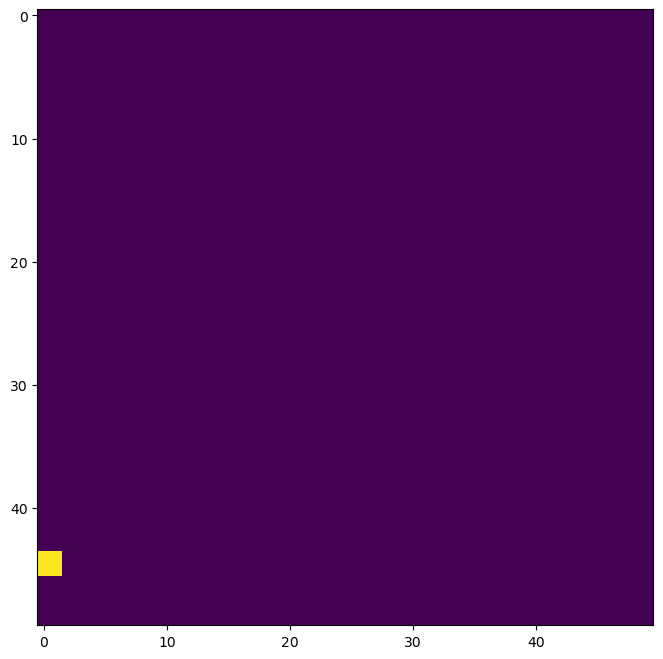

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation as mAnim

def grid(N=50, p=0.5):
    return np.random.choice([0, 1], size=(N, N), p=[1-p, p])
def animate(frame, life_area, img):
    new_grid = np.zeros((N, N))
    for i in range(N):
        for j in range(random.randint(1, N)):
            n = (life_area[(i+1)%N][j] + life_area[(i-1)%N][j]
                 + life_area[i][(j+1)%N] + life_area[i][(j-1)%N]
                 + life_area[(i+1)%N][(j+1)%N] + life_area[(i-1)%N][(j-1)%N]
                 + life_area[(i+1)%N][(j-1)%N] + life_area[(i-1)%N][(j+1)%N])
            if life_area[i][j] == 0 and n == 3:
                new_grid[i][j] = 1
            elif life_area[i][j] == 1 and (n < 2 or n > 3):
                new_grid[i][j] = 0
            else:
                new_grid[i][j] = life_area[i][j]
    img.set_data(new_grid)
    life_area[:] = new_grid[:]
    return img
N = 50
life_area = grid(N=N, p=0.5)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
img = ax.imshow(life_area, interpolation='nearest')
ani = mAnim(fig, animate, fargs=(life_area, img,), frames=200, interval=200, save_count=50)
ani.save('test_async.gif')
plt.show()